# Tensorflow & Keras

### Install (or try colab)
* https://www.tensorflow.org/install
* https://keras.io/ko/

In [136]:
from tensorflow import keras
from keras import models 
from keras import layers

## Logistic Regression

In [137]:
net = models.Sequential()
net.add(layers.Dense(1,activation='sigmoid')) # 출력(units) 1개인 레이어를 생성
net.compile(loss='binary_crossentropy',optimizer='adam',metrics=['binary_accuracy']) # cost function = cross entropy, optimizer 

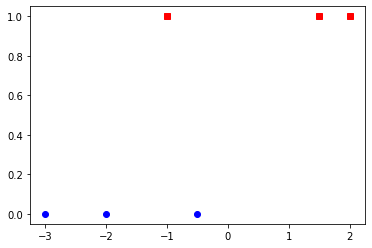

In [138]:
import numpy as np
import matplotlib.pyplot as plt

X=np.array([-3,-2,-0.5,-1,2,1.5])
y=np.array([0,0,0,1,1,1])

plt.plot(X,[i if i==1 else None for i in y],'rs')
plt.plot(X,[i if i==0 else None for i in y],'bo')

In [139]:
net.fit(X, y, epochs=1000, verbose=0)

In [140]:
net.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [141]:
net.layers[0].get_weights()

[array([[1.4084346]], dtype=float32), array([0.6904279], dtype=float32)]

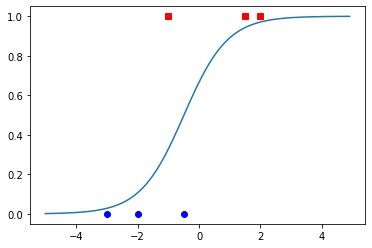

In [142]:
x=np.arange(-5,5,0.1)
plt.plot(x,net.predict(x))

plt.plot(X,[i if i==1 else None for i in y],'rs')
plt.plot(X,[i if i==0 else None for i in y],'bo')

In [143]:
net.predict(X)

array([[0.02833605],
       [0.10655326],
       [0.4965527 ],
       [0.3278321 ],
       [0.9708947 ],
       [0.942842  ]], dtype=float32)

## (Multivariable) Logistic Regression

### AND and OR gate

| $x_1$ | $x_2$ | AND | OR  |
| --- | --- | --- | --- |
| 1   |  1  |  1  |  1  |
| 1   |  0  |  0  |  1  |
| 0   |  1  |  0  |  1  |
| 0   |  0  |  0  |  0  |


In [170]:
X = np.array([[1,1],[1,0],[0,1],[0,0]])
AND = np.array([1,0,0,0])
OR = np.array([1,1,1,0])

In [171]:
net_and = Sequential()
net_and.add(layers.Dense(1, activation='sigmoid'))
net_and.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

net_or = Sequential()
net_or.add(layers.Dense(1, activation='sigmoid')) 
net_or.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [172]:
from keras.utils import to_categorical

AND_train = to_categorical(AND)
OR_train = to_categorical(OR)

In [175]:
net_and.fit(X, AND, epochs=1000, verbose=0)
net_or.fit(X, OR, epochs=1000, verbose=0)

In [176]:
model_and.predict(X)

array([[0.804739  ],
       [0.18566844],
       [0.1815449 ],
       [0.01212242]], dtype=float32)

In [177]:
model_or.predict(X)

array([[0.98855066],
       [0.8728    ],
       [0.86108553],
       [0.33003497]], dtype=float32)

In [178]:
model_and.get_weights()

[array([[2.9220963],
        [2.8945858]], dtype=float32), array([-4.4005013], dtype=float32)]

In [179]:
model_or.get_weights()

[array([[2.633973 ],
        [2.5323622]], dtype=float32), array([-0.7080269], dtype=float32)]

## Softmax (multi input / multi output)
$$ f_i(x)=\frac{e^{w x_i}}{\sum_j e^{w x_j}} $$

In [180]:
from sklearn import datasets
from keras.utils import to_categorical

iris = datasets.load_iris() # 분꽃
X = np.array(iris["data"]) 
y = np.array(iris["target"]).reshape(-1, 1) # setosa=0, versicolor=1, virginica=2
y_train = to_categorical(y)

In [184]:
sm = Sequential()
sm.add(layers.Dense(3, activation='softmax'))
sm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [185]:
sm.fit(X, y_train, epochs=1000, verbose=0)

In [186]:
sm.evaluate(X, y_train)

5/5 [==============================] - 0s 541us/step - loss: 0.2076 - accuracy: 0.9600


[0.20758715271949768, 0.9599999785423279]